In [5]:
import pandas as pd
import os

In [6]:
os.getcwd()

'/Users/jzegler/Desktop/Python-A-Z-Programming-Course'

In [7]:
movies = pd.read_csv('/Users/jzegler/Downloads/MovieRatings.csv')

In [8]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
len(movies) # Number of rows

559

In [10]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [11]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',\
                  'BudgetMillions', 'Year']

In [12]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.info() #Year is meant to be a categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [14]:
movies.describe() #See the stats for year dont make sense

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [15]:
movies.Film = movies.Film.astype('category') #Changing to category

In [16]:
movies.info() #See difference

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [17]:
movies.Genre = movies.Genre.astype('category') #Changing to category
movies.Year = movies.Year.astype('category') #Changing to category

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [19]:
movies.Genre.cat.categories #See values of category

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [20]:
movies.describe() #python removed Year bc it knows its a category now

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
    #^shows visualizations in Jupyter
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Jointplots - def'n

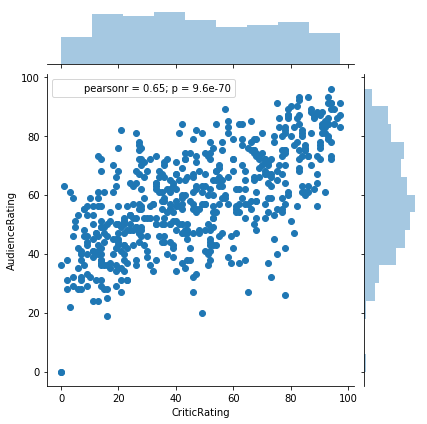

In [23]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

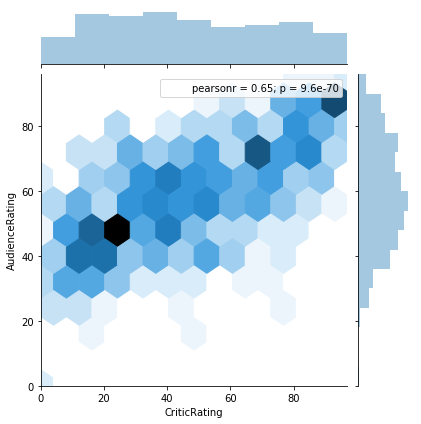

In [24]:
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind = 'hex')

---

In [26]:
#HISTOGRAMS

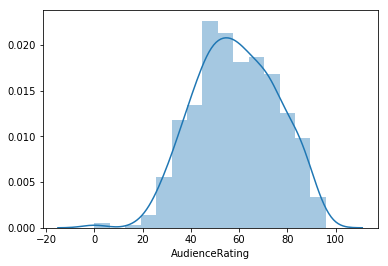

In [27]:
#already know this method:
m1 = sns.distplot(movies.AudienceRating, bins=15)

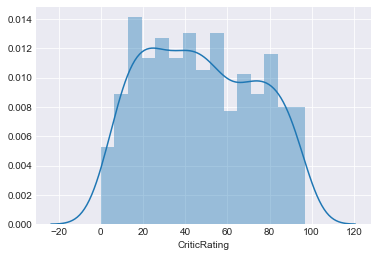

In [28]:
sns.set_style('darkgrid')
m2 = sns.distplot(movies.CriticRating, bins=15)

In [29]:
#Notice difference between ratings:
#Critics have more uniform distribution bc of their criteria, 
#while audiences are normal

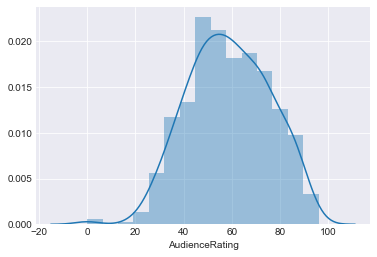

In [30]:
sns.set_style('darkgrid') #different styles
n1 = sns.distplot(movies.AudienceRating, bins=15)

In [31]:
#STACKED HISTOGRAM

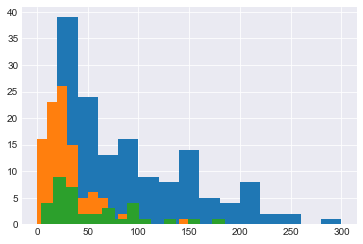

In [87]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15) #budgetmillions for action
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

In [33]:
#^we want bars to be stacked, not overlap, NEXT

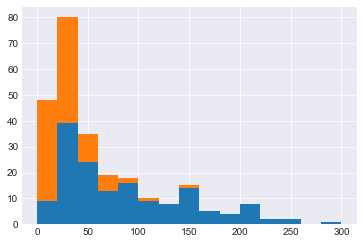

In [34]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions], bins=15, stacked=True)
plt.show()

In [36]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [37]:
list1 = [] 
mylabels = []
for gen in movies.Genre.cat.categories: 
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen) #for legend (can ignore)
print(list1) #not necessary, just a check

[2       20
5      200
15      35
29      20
30      20
33     237
36      45
39      45
40      70
45     150
49      68
52      17
58     140
60      85
63      40
66     125
67      25
69      40
70      90
73      30
76     163
77      13
81      25
83      20
86      45
94      30
98      33
101     75
102     30
106     45
      ... 
433    138
435     50
439     40
441     80
443    150
448     25
451     40
454    145
458    100
472    150
473      6
474      0
477    100
479     75
493    150
495     35
499    150
500    195
501    210
502     30
504    170
512     35
514     95
528     75
530     25
531    130
542     35
546    150
547    160
557     24
Name: BudgetMillions, Length: 154, dtype: int64, 1      105
3       18
19     200
21      45
24      40
32      78
46      20
65      38
68     140
130     73
165     12
166    125
167    250
168    150
176     36
178    150
192     70
193     60
241     60
272     37
341     19
363     70
386    130
401    155
459     59
463 

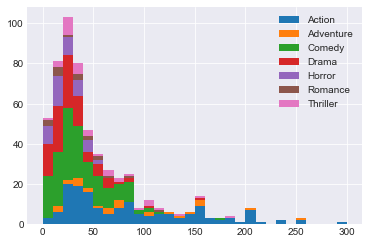

In [38]:
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels )
plt.legend()
plt.show()

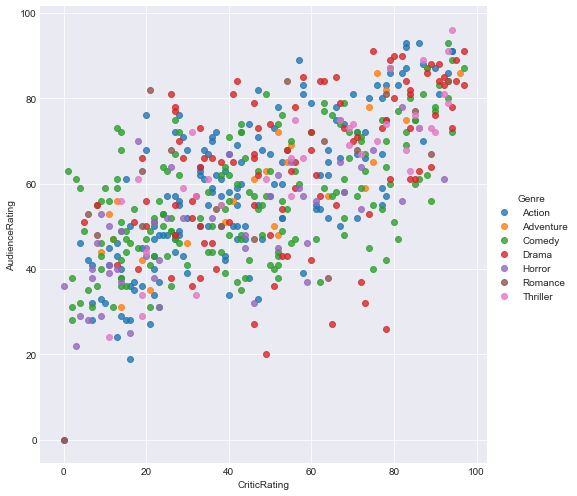

In [40]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating',\
                 fit_reg=False, hue='Genre', size=7, aspect=1)

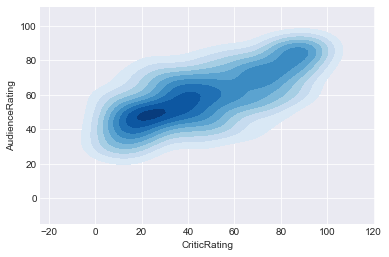

In [41]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, \
                 shade=True, shade_lowest=False, cmap='Blues')

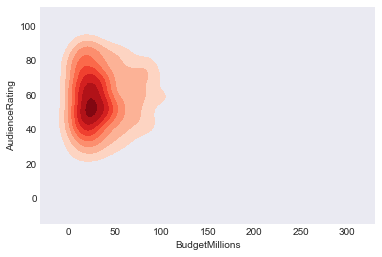

In [42]:
#Working with Subplots
sns.set_style("dark")
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

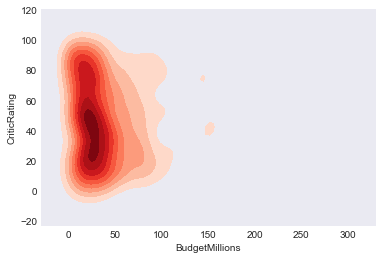

In [43]:
k3 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, cmap='Reds')

[(-20, 120)]

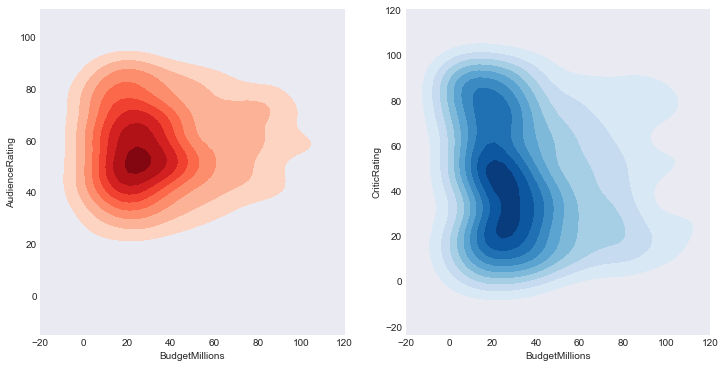

In [44]:
f, axes = plt.subplots(1, 2, figsize=(12,6)) #1 row, 2 columns #places charts in the different spaces
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[0]) #if 2D subplots then (0,0) etc
k3 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, cmap='Blues', ax=axes[1])
k2.set(xlim=(-20,120)) #or in parameters use sharex=True and/or sharey=True
k3.set(xlim=(-20, 120))

In [45]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a19c7bfd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1a34abe0>], dtype=object)

In [46]:
#Violin Plots

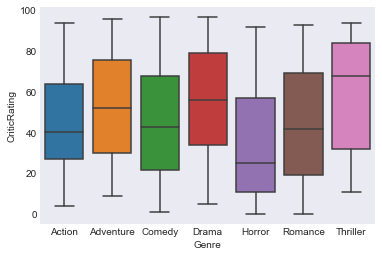

In [47]:
x = sns.boxplot(data=movies, x='Genre', y='CriticRating')

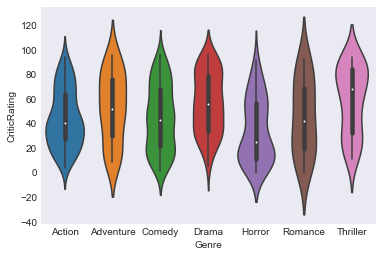

In [48]:
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

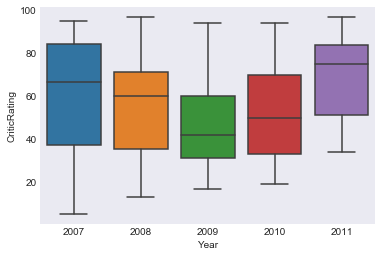

In [49]:
Q = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating')

In [50]:
#Creating a Facet Grid

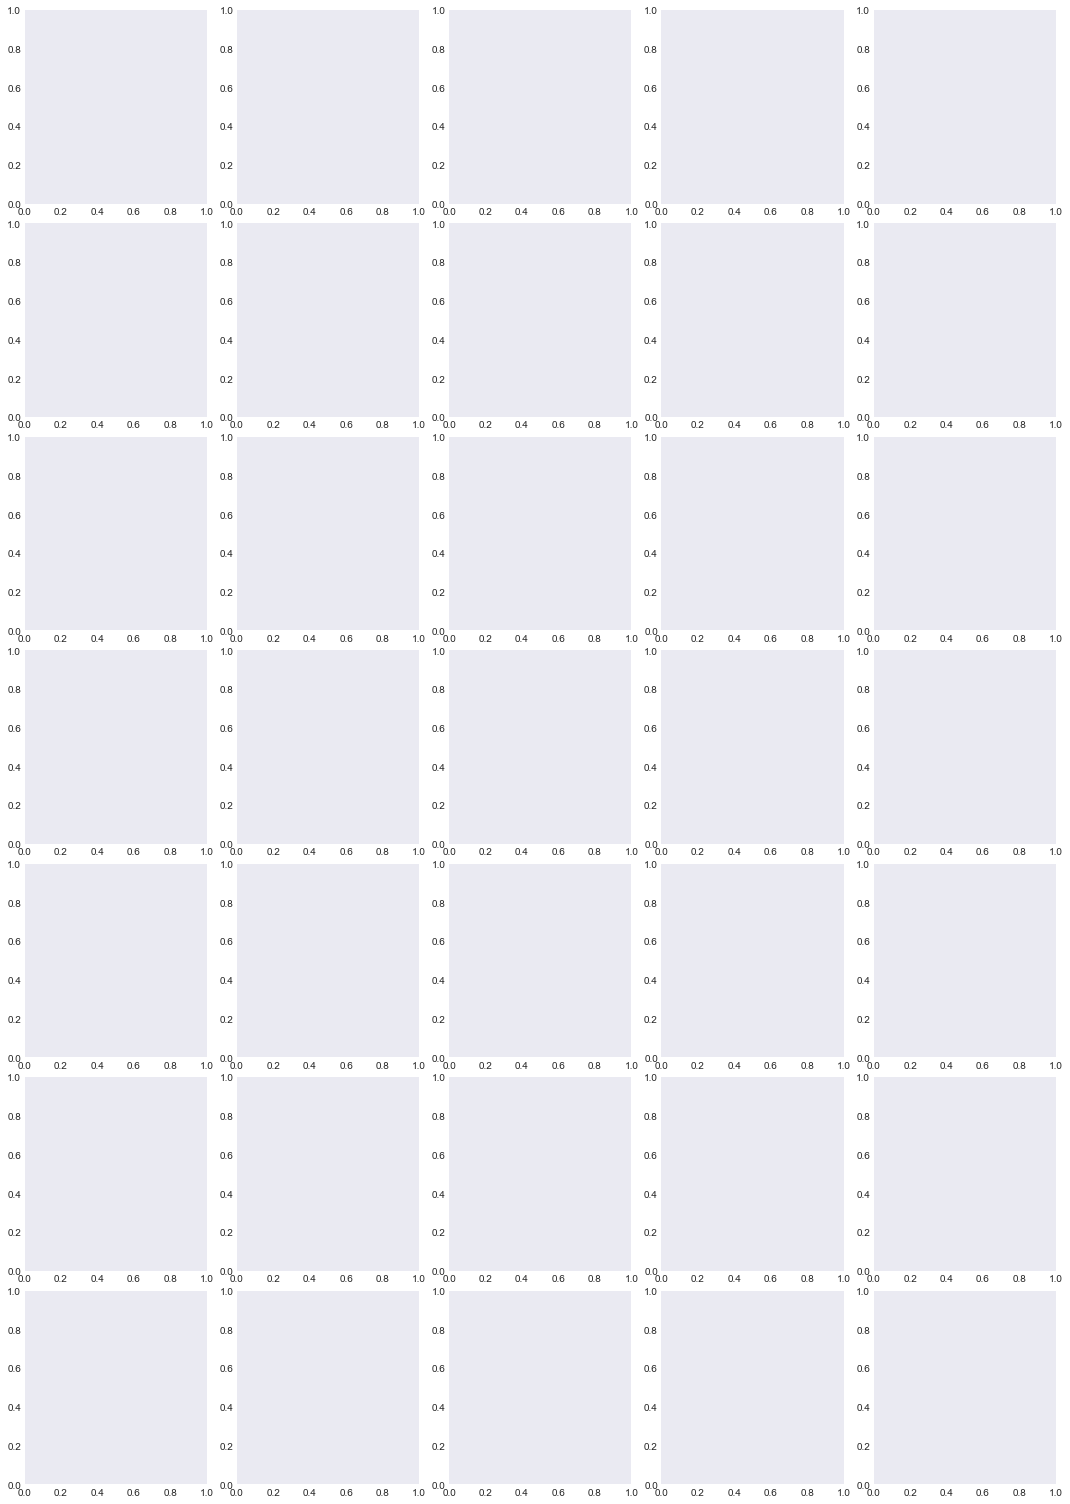

In [51]:
g = sns.FacetGrid(movies, row = 'Genre', col='Year', hue='Genre')

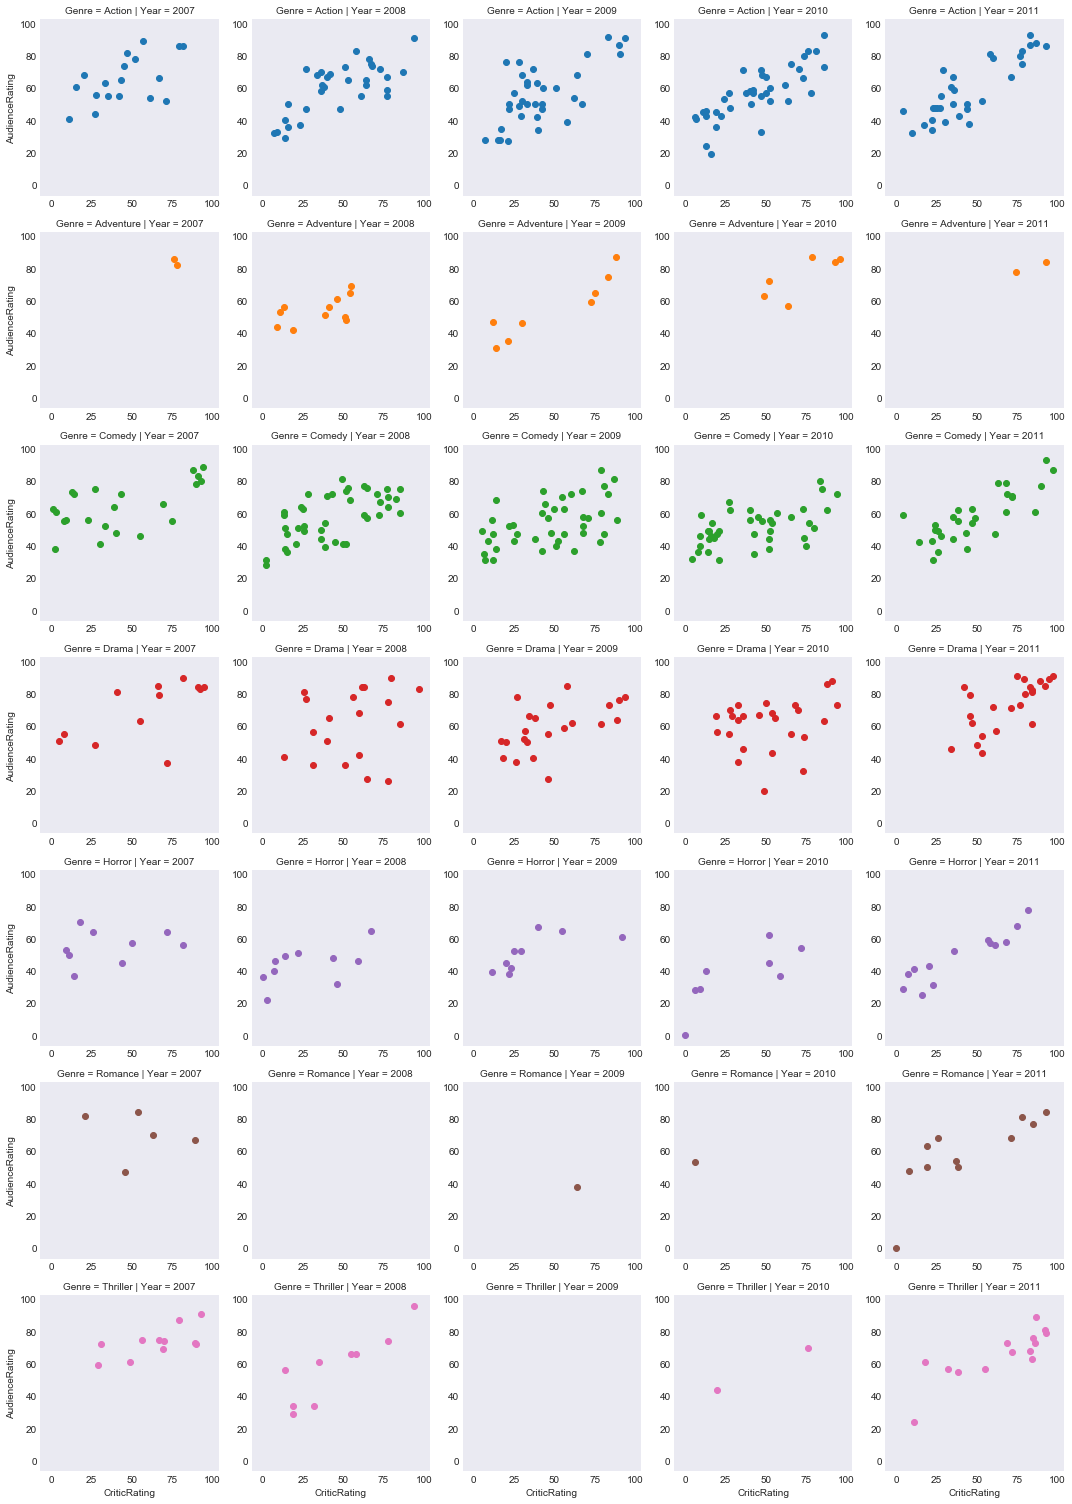

In [52]:
g = sns.FacetGrid(movies, row = 'Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

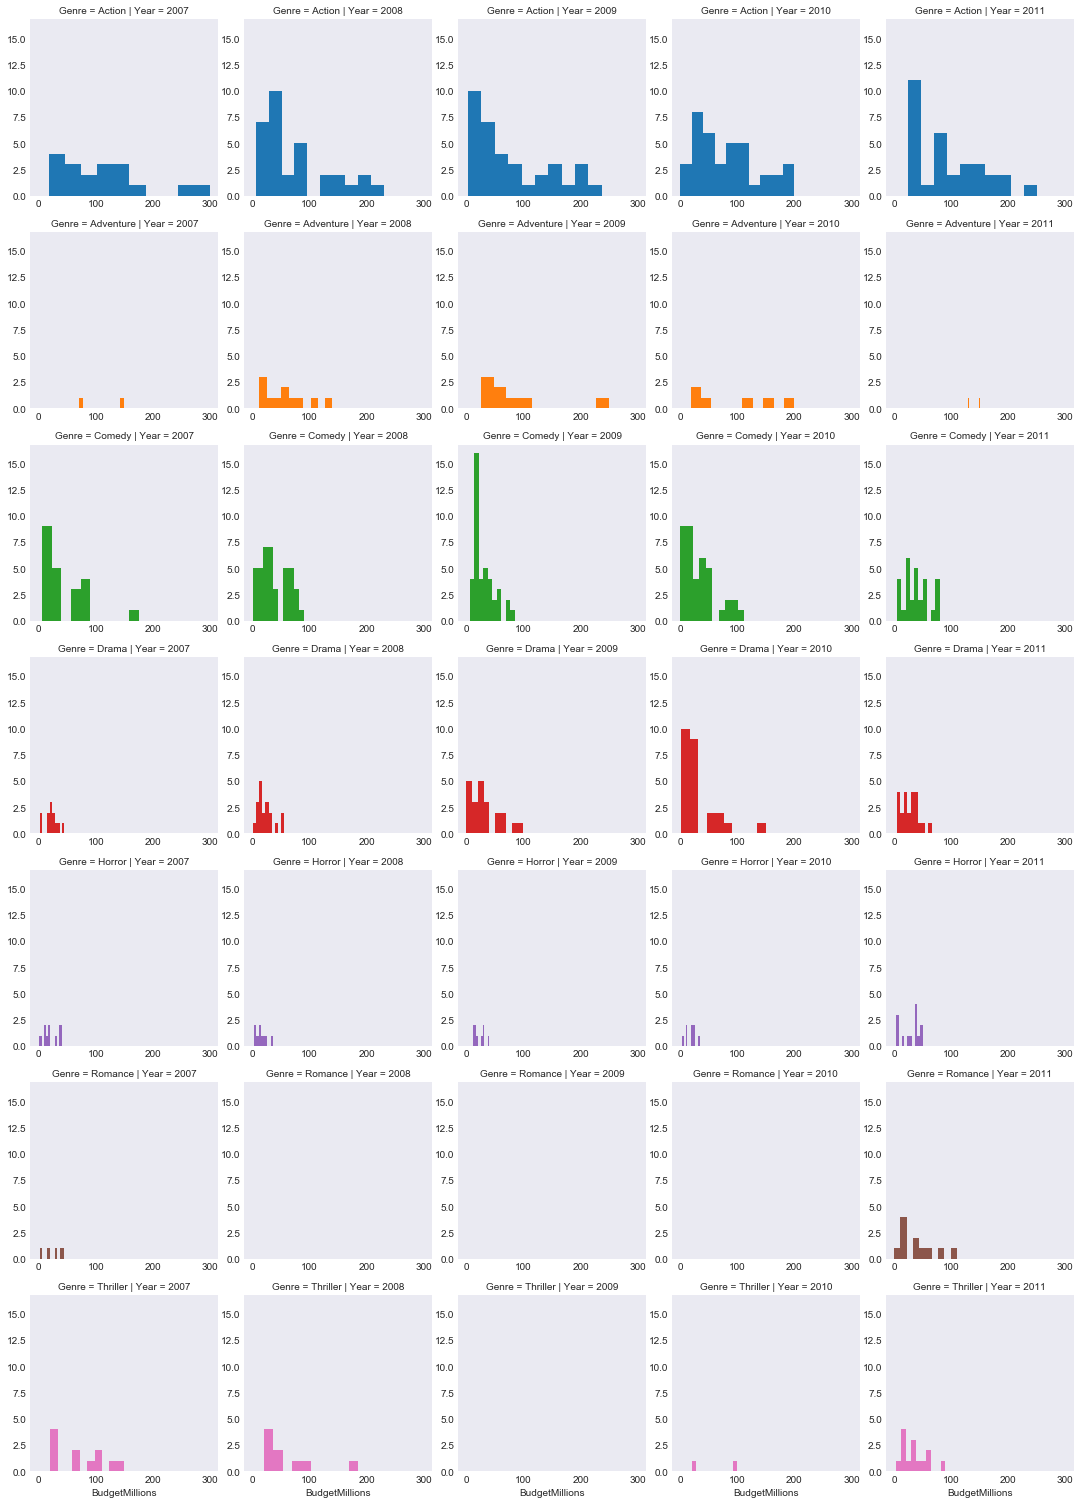

In [53]:
#can populate with any type of chart. Example: Histogram
g = sns.FacetGrid(movies, row = 'Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

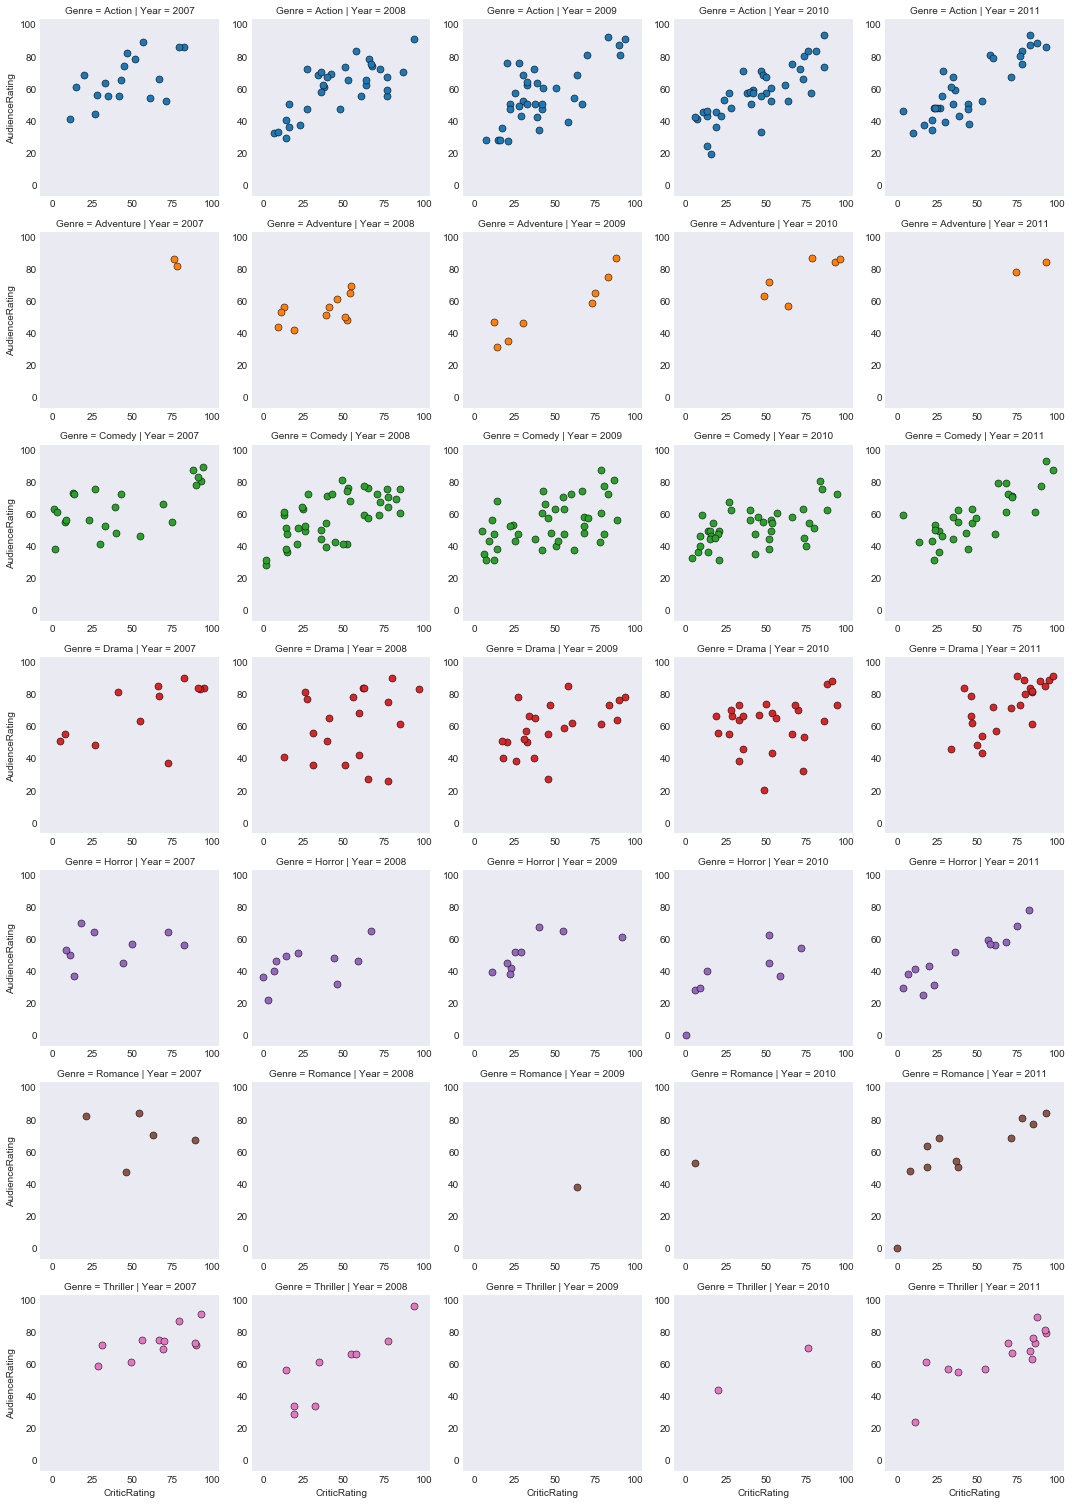

In [54]:
#back to the scatter plot
g = sns.FacetGrid(movies, row = 'Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [55]:
kws

{'edgecolor': 'black', 'linewidth': 0.5, 's': 50}

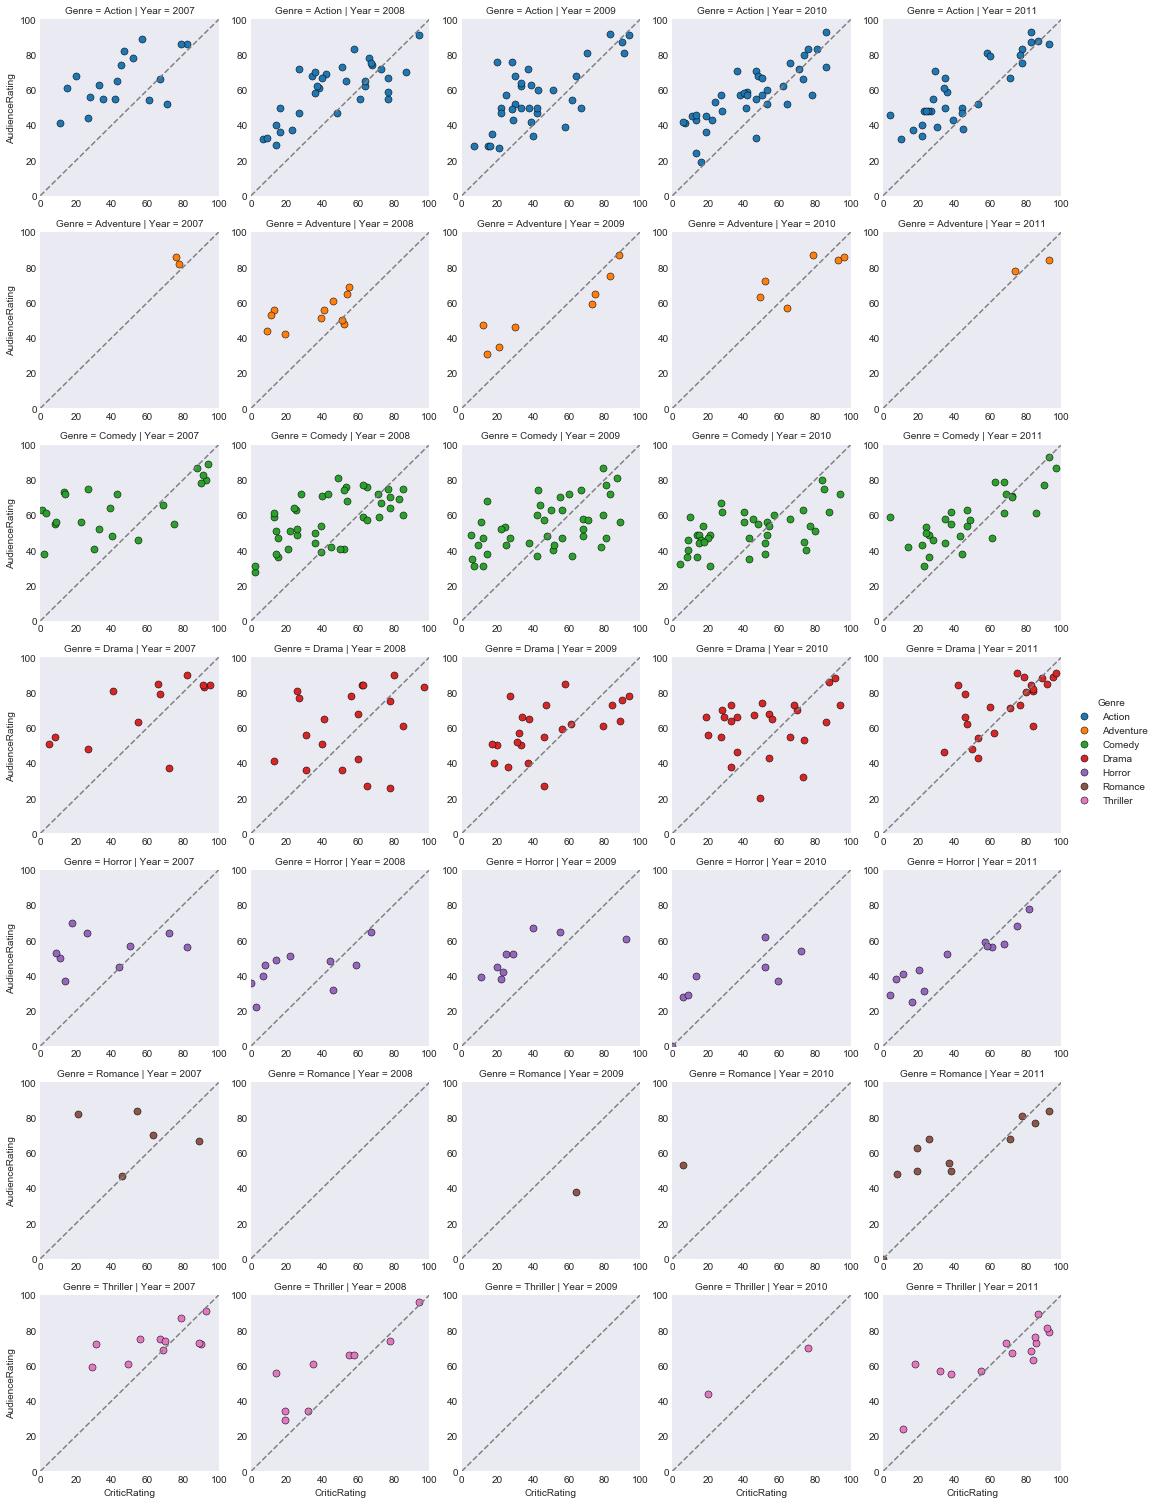

In [56]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row = 'Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
## new stuff below
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat: #adding diagonal
    ax.plot((0,100), (0,100), c='gray', ls='--')
g.add_legend() #for legend

In [57]:
#Building Dashboards

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
    #^shows visualizations in Jupyter
import warnings
warnings.filterwarnings('ignore')

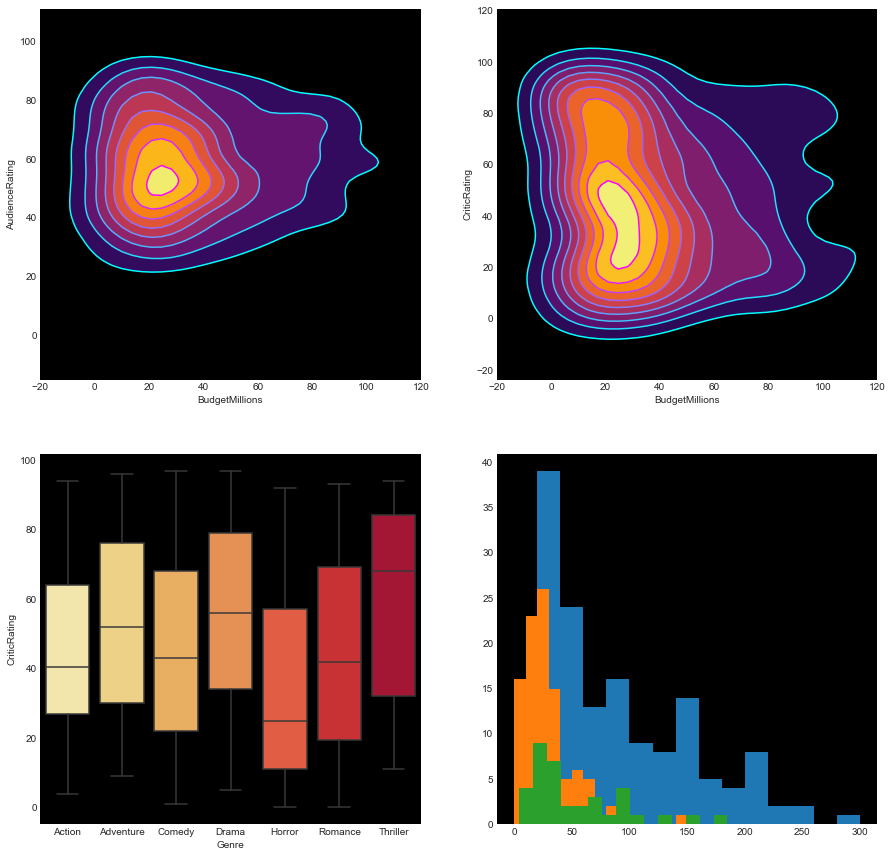

In [109]:
sns.set_style("dark", {"axes.facecolor": "black"}) #white, whitegrid, dark, darkgrid, ticks
f, axes = plt.subplots(2, 2, figsize = (15,15))
#plot 
axes[1,1].hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15) #budgetmillions for action
axes[1,1].hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
axes[1,1].hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
# ^ must research diff methods for putting diff plots into subplots
x = sns.boxplot(data=movies, x='Genre', y='CriticRating', ax=axes[1, 0], palette='YlOrRd')
#Plot [0,0]
k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=False, cmap='inferno', ax=axes[0,0])
k2b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0,0])
#Plot [0,1]
k3 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade=True, shade_lowest=False, cmap='inferno', ax=axes[0,1])
k3b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap='cool', ax=axes[0,1])
#above is an outliine, same code but w/o shading
k2.set(xlim=(-20,120))
k3.set(xlim=(-20,120))
plt.show()
#to get list of different colormaps, simply put in an incorrect argument


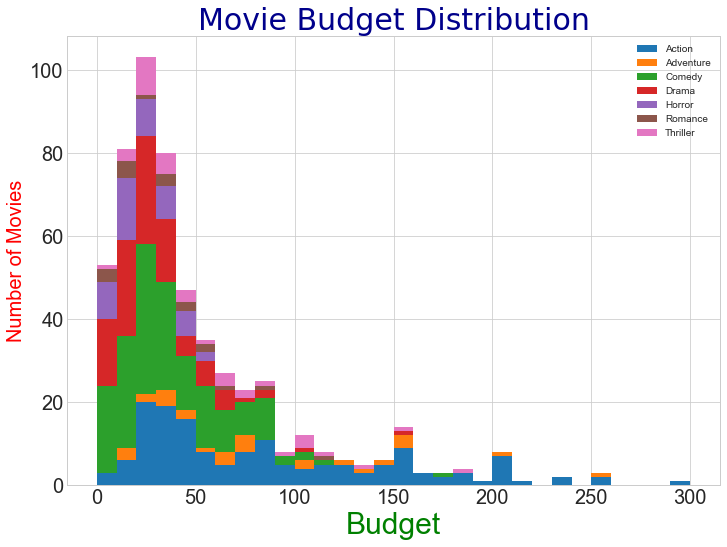

In [122]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #Size of A4 paper
pp = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=30, color = "DarkBlue", fontname="Console")
plt.ylabel("Number of Movies", fontsize = 20, color="Red")
plt.xlabel("Budget", fontsize=30, color="Green")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend()
plt.show()